In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import shapely as sh
from shapely.geometry import Polygon
from shapely.ops import cascaded_union
from shapely.geometry import Point
from descartes.patch import PolygonPatch

In [3]:
def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', color='#999999', zorder=1)

In [4]:
#coordinates are taken from
#https://desi.lbl.gov/trac/browser/code/focalplane/positioner_control/trunk/anticollision/pos_geometry.m?rev=1660

In [5]:
lower_ferrule_pos = array(((0.387, 0.990), (0.967,0.410), (0.967, -0.410), (0.387, -0.990), (-0.649, -0.990), 
                    (-1.000, -0.639), (-1.000, 0.639), (-0.649, 0.990)))
print shape(lower_ferrule_pos)
print type(lower_ferrule_pos)
tmp = lower_ferrule_pos.copy()
tmp[:,1] = lower_ferrule_pos[:,1]
lower_ferrule_pos[:,1] = lower_ferrule_pos[:,0]
lower_ferrule_pos[:,0] = tmp[:,1]
lower_ferrule_pos[:,0] = lower_ferrule_pos[:,0]+3.00
lower_ferrule_pos[:,1] = lower_ferrule_pos[:,1]+3.00

low_poly= Polygon(lower_ferrule_pos)

(8, 2)
<type 'numpy.ndarray'>


In [6]:
upper_ferrule_pos=array(((0.387, 0.990), (0.967, 0.410), (0.967,-0.410), (0.387,-0.990), (-2.235,-0.990), 
                   (-2.668, -1.240), (-3.514, -1.240), (-4.240,-0.514), (-4.240,0.514), (-3.682,1.072), 
                  (-2.994,1.339), (-2.944,1.922), (-2.688, 2.015 ), (-1.981,1.757 ), (-1.844, 0.990)))
tmp = upper_ferrule_pos.copy()
tmp[:,1] = upper_ferrule_pos[:,1]
upper_ferrule_pos[:,1] = upper_ferrule_pos[:,0]
upper_ferrule_pos[:,0] = tmp[:,1]
upper_ferrule_pos[:,0] = upper_ferrule_pos[:,0]+3.00
upper_ferrule_pos[:,1] = upper_ferrule_pos[:,1]+3.00

up_poly = Polygon(upper_ferrule_pos)

In [7]:
central_axis_body = array((( 4.358 , -2.500), (5.095,-0.474),(5.095,0.605),(4.348,1.792), 
                    (3.000,2.180), (1.652, 1.792), (0.905, 0.605), (0.905 ,-0.356), 
                    (1.759, -2.792), (2.771, -2.500)))

central_poly = Polygon(central_axis_body)

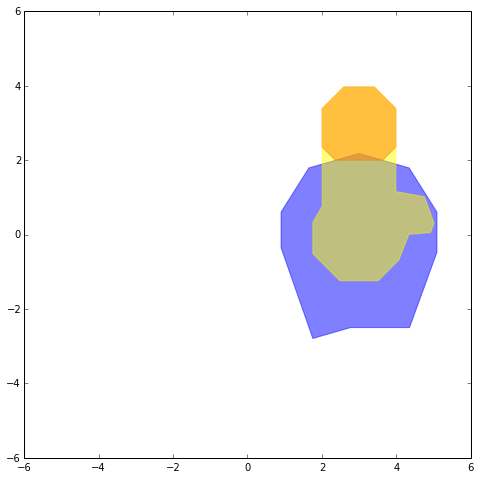

In [11]:
fig, ax = subplots(figsize=(8, 8))
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)

patch_u = PolygonPatch(up_poly, facecolor='yellow', edgecolor='yellow', alpha=0.5, zorder=2)
patch_c = PolygonPatch(central_poly, facecolor='blue', edgecolor='blue', alpha=0.5, zorder=2)
patch_l = PolygonPatch(low_poly, facecolor='red', edgecolor='red', alpha=0.5, zorder=2)

ax.add_patch(patch_c)
ax.add_patch(patch_l)
ax.add_patch(patch_u)